# Multiple Linear Regression using Diamonds dataset



# **ABOUT THE DATA**


> This classic dataset contains the prices and other attributes of almost 54,000 diamonds.


* price price in US dollars (\$326--\$18,823)

* carat weight of the diamond (0.2--5.01)

* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

* color diamond colour, from J (worst) to D (best)

* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

* x length in mm (0--10.74)

* y width in mm (0--58.9)

* z depth in mm (0--31.8)

* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

* table width of top of diamond relative to widest point (43--95)



Step-1 Importing the Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split#(80%training/20%testing)
from sklearn import metrics
import statsmodels.api as sm
#for data visualization
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns 
sns.set(style='whitegrid')
#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Step-2 Loading the Data

In [ ]:
df = pd.read_csv("/content/DiamondsNew.csv")

Step-3 Visualizing the Data Frame

In [ ]:
df.head(10)

,Unnamed: 0,cut,clarity,color,price,depth,carat,table,x,y,z
0,1,Ideal,SI2,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,2,Premium,SI1,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,3,Good,VS1,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,4,Premium,VS2,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,5,Good,SI2,J,335,63.3,0.31,58.0,4.34,4.35,2.75
5,6,Very Good,VVS2,J,336,62.8,0.24,57.0,3.94,3.96,2.48
6,7,Very Good,VVS1,I,336,62.3,0.24,57.0,3.95,3.98,2.47
7,8,Very Good,SI1,H,337,61.9,0.26,55.0,4.07,4.11,2.53
8,9,Fair,VS2,E,337,65.1,0.22,61.0,3.87,3.78,2.49
9,10,Very Good,VS1,H,338,59.4,0.23,61.0,4.00,4.05,2.39


Step-4 Exploring the Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   cut         53940 non-null  object 
 2   clarity     53940 non-null  object 
 3   color       53940 non-null  object 
 4   price       53940 non-null  int64  
 5   depth       53940 non-null  float64
 6   carat       53940 non-null  float64
 7   table       53940 non-null  float64
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [ ]:
df.axes

[RangeIndex(start=0, stop=53940, step=1),
 Index(['Unnamed: 0', 'cut', 'clarity', 'color', 'price', 'depth', 'carat',
        'table', 'x', 'y', 'z'],
       dtype='object')]

In [ ]:
df.columns

Index(['Unnamed: 0', 'cut', 'clarity', 'color', 'price', 'depth', 'carat',
       'table', 'x', 'y', 'z'],
      dtype='object')

In [ ]:
df.dtypes

Unnamed: 0      int64
cut            object
clarity        object
color          object
price           int64
depth         float64
carat         float64
table         float64
x             float64
y             float64
z             float64
dtype: object

Step-5 Cleaning the data

In [ ]:
#Deleting unnamed column 
df=df.drop(['Unnamed: 0'], axis=1)

In [ ]:
df.head()

,cut,clarity,color,price,depth,carat,table,x,y,z
0,Ideal,SI2,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,Premium,SI1,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,Good,VS1,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,Premium,VS2,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,Good,SI2,J,335,63.3,0.31,58.0,4.34,4.35,2.75


In [ ]:
df.describe()

,price,depth,carat,table,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,3932.799722,61.749405,0.797940,57.457184,5.731157,5.734526,3.538734
std,3989.439738,1.432621,0.474011,2.234491,1.121761,1.142135,0.705699
min,326.000000,43.000000,0.200000,43.000000,0.000000,0.000000,0.000000
25%,950.000000,61.000000,0.400000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,61.800000,0.700000,57.000000,5.700000,5.710000,3.530000
75%,5324.250000,62.500000,1.040000,59.000000,6.540000,6.540000,4.040000
max,18823.000000,79.000000,5.010000,95.000000,10.740000,58.900000,31.800000


In [ ]:
#Checking for minimum values for each column
#since dimensions of a diamond cannot be 0 we will check for null or 0 values in x, y and z
df.columns

Index(['cut', 'clarity', 'color', 'price', 'depth', 'carat', 'table', 'x', 'y',
       'z'],
      dtype='object')

In [ ]:
print("Number of rows with 0 value in x is {}".format((df.x==0).sum()))
print("Number of rows with 0 value in y is {}".format((df.y==0).sum()))
print("Number of rows with 0 value in z is {}".format((df.z==0).sum()))

Number of rows with 0 value in x is 8
Number of rows with 0 value in y is 7
Number of rows with 0 value in z is 20


In [ ]:
#Checking for Nan Values
df.isnull().sum()

cut        0
clarity    0
color      0
price      0
depth      0
carat      0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
#replacing all 0 values by NaN
df[['x','y','z']] = df[['x','y','z']].replace(0,np.NaN)

In [ ]:
#checking for null values 
df.isnull().sum()

cut         0
clarity     0
color       0
price       0
depth       0
carat       0
table       0
x           8
y           7
z          20
dtype: int64

In [ ]:
#removing NaN values
df.dropna(inplace=True) 
df.isnull().sum()

cut        0
clarity    0
color      0
price      0
depth      0
carat      0
table      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df.head()

,cut,clarity,color,price,depth,carat,table,x,y,z
0,Ideal,SI2,E,326,61.5,0.23,55.0,3.95,3.98,2.43
1,Premium,SI1,E,326,59.8,0.21,61.0,3.89,3.84,2.31
2,Good,VS1,E,327,56.9,0.23,65.0,4.05,4.07,2.31
3,Premium,VS2,I,334,62.4,0.29,58.0,4.20,4.23,2.63
4,Good,SI2,J,335,63.3,0.31,58.0,4.34,4.35,2.75


In [ ]:
#Removing extra variables
#Combing x ,y and z as one
df['volume'] = df['x']*df['y']*df['z']
df.drop(['x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df.head()

,cut,clarity,color,price,depth,carat,table,volume
0,Ideal,SI2,E,326,61.5,0.23,55.0,38.202030
1,Premium,SI1,E,326,59.8,0.21,61.0,34.505856
2,Good,VS1,E,327,56.9,0.23,65.0,38.076885
3,Premium,VS2,I,334,62.4,0.29,58.0,46.724580
4,Good,SI2,J,335,63.3,0.31,58.0,51.917250


In [ ]:
df.describe()

,price,depth,carat,table,volume
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,3930.993231,61.749514,0.797698,57.456834,129.897567
std,3987.280446,1.432331,0.473795,2.234064,78.219789
min,326.000000,43.000000,0.200000,43.000000,31.707984
25%,949.000000,61.000000,0.400000,56.000000,65.189759
50%,2401.000000,61.800000,0.700000,57.000000,114.840180
75%,5323.250000,62.500000,1.040000,59.000000,170.846415
max,18823.000000,79.000000,5.010000,95.000000,3840.598060


In [ ]:
df.color.unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

Color : Color of the Diamond.
With D being the best and J the worst.

In [ ]:
df=df.replace({'color' : { 'D' : 6, 'E' : 5, 'F' : 4, 'G' : 3, 'H': 2, 'I':1, 'J':0}})

In [ ]:
df.cut.unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [ ]:
df=df.replace({'cut': {'Fair':0,'Good':1,'Very Good':2,'Premium':3,'Ideal':4}})

(In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3

In [ ]:
df.clarity.unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [ ]:
df=df.replace({'clarity': {"IF": 8, 'VVS1' :7, 'VVS2': 6, 'VS1': 5, 'VS2': 4, 'SI1':3, 'SI2': 2, 'I1':1}})

In [ ]:
df.head(10)

,cut,clarity,color,price,depth,carat,table,volume
0,4,2,5,326,61.5,0.23,55.0,38.202030
1,3,3,5,326,59.8,0.21,61.0,34.505856
2,1,5,5,327,56.9,0.23,65.0,38.076885
3,3,4,1,334,62.4,0.29,58.0,46.724580
4,1,2,0,335,63.3,0.31,58.0,51.917250
5,2,6,0,336,62.8,0.24,57.0,38.693952
6,2,7,1,336,62.3,0.24,57.0,38.830870
7,2,3,2,337,61.9,0.26,55.0,42.321081
8,0,4,5,337,65.1,0.22,61.0,36.425214
9,2,5,2,338,59.4,0.23,61.0,38.718000


Step-6 Plot the heat map of IV vs DV and DV vs DV to know about multicollinearity

Ways for detecting MULTICOLLINEARITY


*   HeatMap
*   VIF





In [ ]:
df.columns

Index(['cut', 'clarity', 'color', 'price', 'depth', 'carat', 'table',
       'volume'],
      dtype='object')

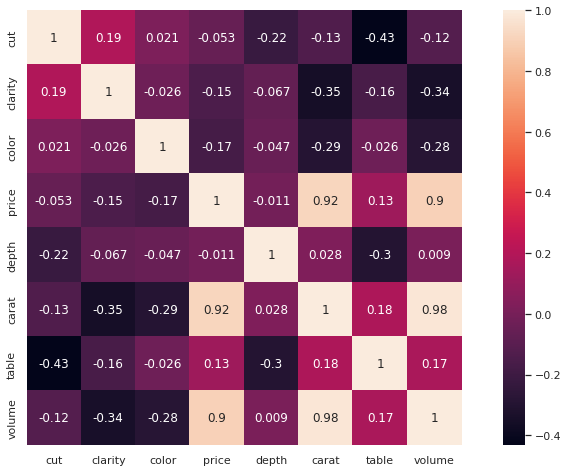

In [ ]:
#Plot heat map to see the correlation among the variables
corr = df.corr()
plt.figure(figsize = (15,8)) #To set the figure size
sns.heatmap(data=corr, square=True , annot=True, cbar=True)

We can observe that independent variables volume and carat have strong correlation .
So we will drop volume column before implementing regression

In [ ]:
df=df.drop(['volume'], axis=1)
df.head(10)

,cut,clarity,color,price,depth,carat,table
0,4,2,5,326,61.5,0.23,55.0
1,3,3,5,326,59.8,0.21,61.0
2,1,5,5,327,56.9,0.23,65.0
3,3,4,1,334,62.4,0.29,58.0
4,1,2,0,335,63.3,0.31,58.0
5,2,6,0,336,62.8,0.24,57.0
6,2,7,1,336,62.3,0.24,57.0
7,2,3,2,337,61.9,0.26,55.0
8,0,4,5,337,65.1,0.22,61.0
9,2,5,2,338,59.4,0.23,61.0


Step 7- Identify the outliers and remove them

**What are outliers?**
*   Outliers are data points that are far from other data points. In other words, they’re unusual values in a dataset.
**Why do we need to remove them?**
*   Outliers are problematic for many statistical analyses because they can cause tests to either miss significant findings or distort real results.


**USING Inter quartile range (IQR) method**
1. Find the first quartile, Q1.

1.  Find the third quartile, Q3.
2.   Calculate the IQR. IQR= Q3-Q1.
3.Define the normal data range with lower limit as Q1–1.5*IQR and upper limit as Q3+1.5*IQR. 
4. Any data point outside this range is considered as outlier and should be removed for further analysis.

In [ ]:
df.head()

,cut,clarity,color,price,depth,carat,table
0,4,2,5,326,61.5,0.23,55.0
1,3,3,5,326,59.8,0.21,61.0
2,1,5,5,327,56.9,0.23,65.0
3,3,4,1,334,62.4,0.29,58.0
4,1,2,0,335,63.3,0.31,58.0


*Using Box plot from seaborn package to visualize outliers*

In [ ]:
df.shape

(53920, 7)

In [ ]:
def interQuartile(x):
    Q1= x.quantile(0.25)
    Q3=x.quantile(0.75)
    IQR=Q3-Q1
    upperLimit= Q3+1.5*IQR
    lowerLimit=Q1-1.5*IQR
    return upperLimit, lowerLimit

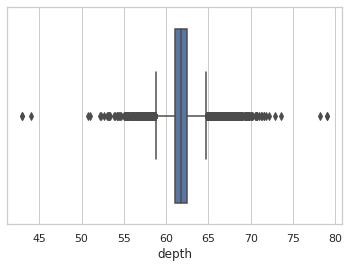

In [ ]:
#removing outliers from depth
#Boxplot to visualize outliers in depth column
sns.boxplot(df['depth'])
upper,lower= interQuartile(df['depth'])
df= df[df['depth'] < upper]
df= df[df['depth']>lower]

Checking the shape to see if the outliers are removed

In [ ]:
df.shape

(51377, 7)

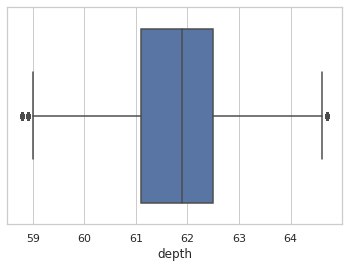

In [ ]:
#removing outliers from depth
#Boxplot to visualize outliers in depth column
sns.boxplot(df['depth'])
upper,lower= interQuartile(df['depth'])
df= df[df['depth'] < upper]
df= df[df['depth']>lower]

In [ ]:
df.head()

,cut,clarity,color,price,depth,carat,table
0,4,2,5,326,61.5,0.23,55.0
1,3,3,5,326,59.8,0.21,61.0
3,3,4,1,334,62.4,0.29,58.0
4,1,2,0,335,63.3,0.31,58.0
5,2,6,0,336,62.8,0.24,57.0


**Step 8-Normalize or Standardize the predictor variable**

In [ ]:
#Applying min_max normalization on predictor columns carat, table and depth
cols=['carat', 'depth', 'table'] #identifying the columns to be normalized
df[cols]= (df[cols]-df[cols].min())/(df[cols].max()-df[cols].min())

In [ ]:
#Built-in function to standardize the data
from sklearn.preprocessing import StandardScaler
cols=['carat', 'depth','table'] #identifying the columns to be standardized
for i in cols:
#fit the training data with standard scale
    scale = StandardScaler().fit(df[[i]])
# standardize the numerical predictor columns in the dataframe
    df[i] = scale.transform(df[[i]])

Step 9- Implement Linear Regression Model

In [ ]:
#Define the independent and dependent variables
y= df['price'] #dependent variable is price
x= df.drop(['price'], axis=1)

In [ ]:
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2)

In [ ]:
model = LinearRegression() #Create a linear regression model
model.fit(x_train,y_train) #Fit the data

LinearRegression()

In [ ]:
#Predict the value of y based on the test data
y_prediction =  model.predict(x_test)

In [ ]:
b0= model.intercept_
b1= model.coef_
print(" Equation of the regression line is \n y_est= {} + {}x1 + {}x2 + {}x3 + {}x4 + {}x5 + {}x6".format(b0,b1[0], b1[1], b1[2], b1[3], b1[4], b1[5]))

 Equation of the regression line is 
 y_est= 531.7232638742703 + 59.365323220596224x1 + 510.86853500030037x2 + 319.5108666785822x3 + -40.551890800323534x4 + 4153.825814515086x5 + -78.94498253733127x6


In [ ]:
#Obtain the r_squared value
print("r_squared value is ", model.score(x,y))

r_squared value is  0.9097149682024049


Step 10- Calculating MSE AND RMSE

In [ ]:
PricePredict = pd.DataFrame({'Actual price': y_test, 'Predicted price': y_prediction}) #Create a dataframe to display actual and Predicted value
PricePredict.head()

,Actual price,Predicted price
19134,7900,6427.786215
38278,386,-509.393416
26609,16357,14594.640662
19001,7822,7608.782067
41864,1257,2416.662844


In [ ]:
PricePredict=PricePredict[(PricePredict > 0).all(1)]

In [ ]:
MSE= (np.sum((PricePredict['Actual price']-PricePredict['Predicted price'])**2))/(len(y_test))
print("Mean Square Error is ", MSE)
print("Root Mean Square Error is  ", np.sqrt(MSE))#Obtain root means square error

Mean Square Error is  1229171.7843194155
Root Mean Square Error is   1108.680199299787


In [ ]:
print("r_squared value is ", model.score(x,y))

r_squared value is  0.9097149682024049


Step 11- Getting the model statistics using statsmodel

In [ ]:
x = sm.add_constant(x) #This is the intercept that has to be added to create the model
modelNew = sm.OLS(y, x) # create the model
fitted = modelNew.fit() #fit the model
fitted.summary() #Obtain the results of regression

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.910
Method:                 Least Squares   F-statistic:                 8.503e+04
Date:                Sun, 14 Aug 2022   Prob (F-statistic):               0.00
Time:                        09:48:37   Log-Likelihood:            -4.3069e+05
No. Observations:               50638   AIC:                         8.614e+05
Df Residuals:                   50631   BIC:                         8.615e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        521.5085     27.394     19.037      0.000     467.816     575.201
cut           59.5383      6.402      9.300      0.000      46.990      72.087
clarity      512.7365      3.526    145.427      0.000     505.826     519.647
color        319.3095      3.307     96.558      0.000     312.828     325.791
depth        -37.6811      6.028     -6.251      0.000     -49.497     -25.866
carat       4154.7339      6.034    688.543      0.000    4142.907    4166.561
table        -74.9686      6.548    -11.449      0.000     -87.802     -62.135
==============================================================================
Omnibus:                    11162.802   Durbin-Watson:                   0.885
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146951.030
Skew:                           0.691   Prob(JB):                         0.00
Kurtosis:                      11.230   Cond. No.                         33.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

CONCLUSION:
91.9% of the variance of the dependent variable being studied(PRICE) is explained by the variance of other independent variables

 While a scatterplot matrix is a good visual approach, a more precise approach is to run a correlation matrix.

 I also observed that after using label encoding on categorical values and using normalization the R square value increased from 0.823 to 0.919